# **Naive Bayes Classification** 

Naive Bayes algoritmasının temeli Bayes teoremine dayanır ve classification problemleri için kullanılır.

Olasılıksal bir sınıflandırıcıdır. Bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır.


Bayes Formülü;

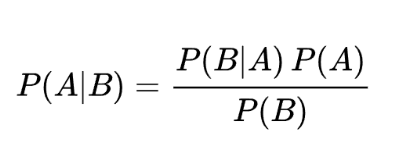

**P(A|B)** =  B olayı gerçekleştiğinde A olayının gerçekleşme olasılığı -> (**posterior probability**)

**P(A)**   = A olayının gerçekleşme olasılığı -> (**prior probability**)

**P(B|A)** = A olayı gerçekleştiğinde B olayının gerçekleşme olasılığı -> (**likelihood**)

**P(B)**   = B olayının gerçekleşme olasılığı -> (**marginal likelihood**)

Her feature birbirinden bağımsız kabul edildiği için **naive** denir.  

Bayes teoremini kullandığı için **bayes** denir.

**Gaussian Naive Bayes:** Eğer featurelar continuous value ise model verilerin normal distribution'a göre örneklendiği varsayılır.

**Multinominal Naive Bayes:** Çok sınıflı kategorileri sınıflandırmak için kullanılır.

**Bernoulli Naive Bayes:** Multinominal Naive Bayes’e benzer şekilde sınıflandırma yapar. Ancak predictionlar Evet/Hayır, Spam/Spam Değil, 1/0, Var/Yok gibi boolean şeklindedir.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data kanserin iyi huylu mu, kötü huylu mu olduğunu gösterir.

Diagnosis sütununda bulunan 'M' harfi malignant kötü huylu demektir.

'B' harfi benign iyi huylu tümör demektir.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Datada 569 sample bulunmaktadır.

33 sütun bulunmakta, bu sütunların 31 tanesi float değer, 1 tanesi integer değer, 1 tanesi de string değer bulundurmaktadır.

'Unnamed: 32' sütunundaki değerlerin hepsinin missing value olduğu görülür.

Model oluşturulurken 'id' ve 'Unnamed: 32' sütunları sınıflandırmada bir etkisi olmayacağından kullanılmayacaktır.

In [ ]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
#axis=1 olduğunda sütun drop edilir.
#inplace=True olduğunda yapılan değişiklik dataya kaydedilir.

İyi huylu ve kötü huylu tümörün görselleştirilmesi için birbirinden ayrılması gerekir.

In [ ]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

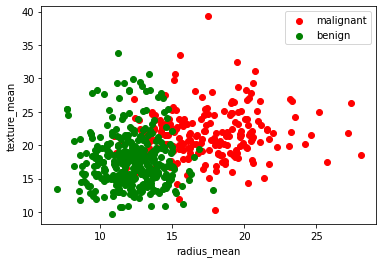

In [ ]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

texture_mean ve radius_mean kullanılarak classify yapılacaktır.

In [ ]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunundaki veriler string olduğundan sınıflandırma yapılırken karşılaştırma yapılamaz.
#bu yüzden kötü huylu tümör '1'e , iyi huylu tümör '0'a dönüştürülür.

y = data.diagnosis.values #pandas series values methodu ile numpy array'e çevrilir.
x_data = data.drop(["diagnosis"],axis=1) #diagnosis dışındakiler featurelardır.

In [ ]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#random_state parametresiyle data train ve test olarak bölünürken kod her çalıştırıldığında aynı randomlıkta bölünür.
#bu parametre kullanılmazsa data her seferinde farklı yerlerden train ve test olarak ayrılacaktır.

In [ ]:
#model fit
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_head = gnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_head)
print("Accuracy of Naive Bayes: {}".format(accuracy))

Accuracy of Naive Bayes: 0.935672514619883


Naive Bayes algoritmasıyla yapılan predictionların %93'ü doğrudur.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

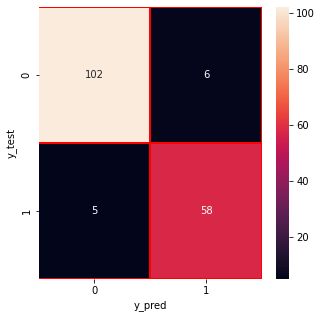

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

0-> iyi huylu tümör

1 -> köyü huylu tümör

**Confusion Matrix**

**TN** **FP**

**FN** **TP** 

Confusion matrix'e bakarak;

iyi huylu tümörde 108 sample'ın 102'sinin doğru tahmin edildiği, 6 sample'ın gerçekte iyi huylu tümör olup kötü huylu tümör olarak yanlış tahmin edildiği 

kötü huylu tümörde 63 sample'ın 58'inin doğru tahmin edildiği, 5 sample'ın gerçekte kötü huylu tümör olup iyi huylu tümör olarak yanlış tahmin edildiği görülür.
